In [1]:
%matplotlib inline

# 将二维网格映射到三维网格中

# 扩展supercell

In [2]:
nodes, edges = [], []

## 创建nodes 和 edges

### top位相关

In [3]:
from catplot.grid_components.nodes import Node2D, Node3D
from catplot.grid_components.edges import Edge2D

In [4]:
top = Node2D([0.0, 0.0], size=800, color="#2A6A9C")

In [5]:
t1 = Node2D([0.0, 1.0])
t2 = Node2D([1.0, 0.0])

In [6]:
nodes.append(top)

In [7]:
e1 = Edge2D(top, t1, width=5)
e2 = Edge2D(top, t2, width=5)

In [8]:
edges.extend([e1, e2])

### bridge相关

In [9]:
bridge1 = Node2D([0.0, 0.5], style="s", size=600, color="#5A5A5A", alpha=0.6)
bridge2 = Node2D([0.5, 0.0], style="s", size=600, color="#5A5A5A", alpha=0.6)

In [10]:
b1 = bridge1.clone([0.5, 0.5])
b2 = bridge2.clone([0.5, 0.5])

In [11]:
nodes.extend([bridge1, bridge2])

In [12]:
e1 = Edge2D(bridge1, b1)
e2 = Edge2D(bridge1, bridge2)
e3 = Edge2D(bridge2, b2)
e4 = Edge2D(b1, b2)

In [13]:
edges.extend([e1, e2, e3, e4])

### hollow位

In [14]:
h = Node2D([0.5, 0.5], style="h", size=700, color="#5A5A5A", alpha=0.3)

In [15]:
nodes.append(h)

## 绘制

In [16]:
from catplot.grid_components.grid_canvas import Grid2DCanvas

In [17]:
from catplot.grid_components.supercell import SuperCell2D

In [18]:
supercell = SuperCell2D(nodes, edges)

## 将此supercell进行扩展

In [19]:
expanded_supercell = supercell.expand(4, 4)

## 绘制

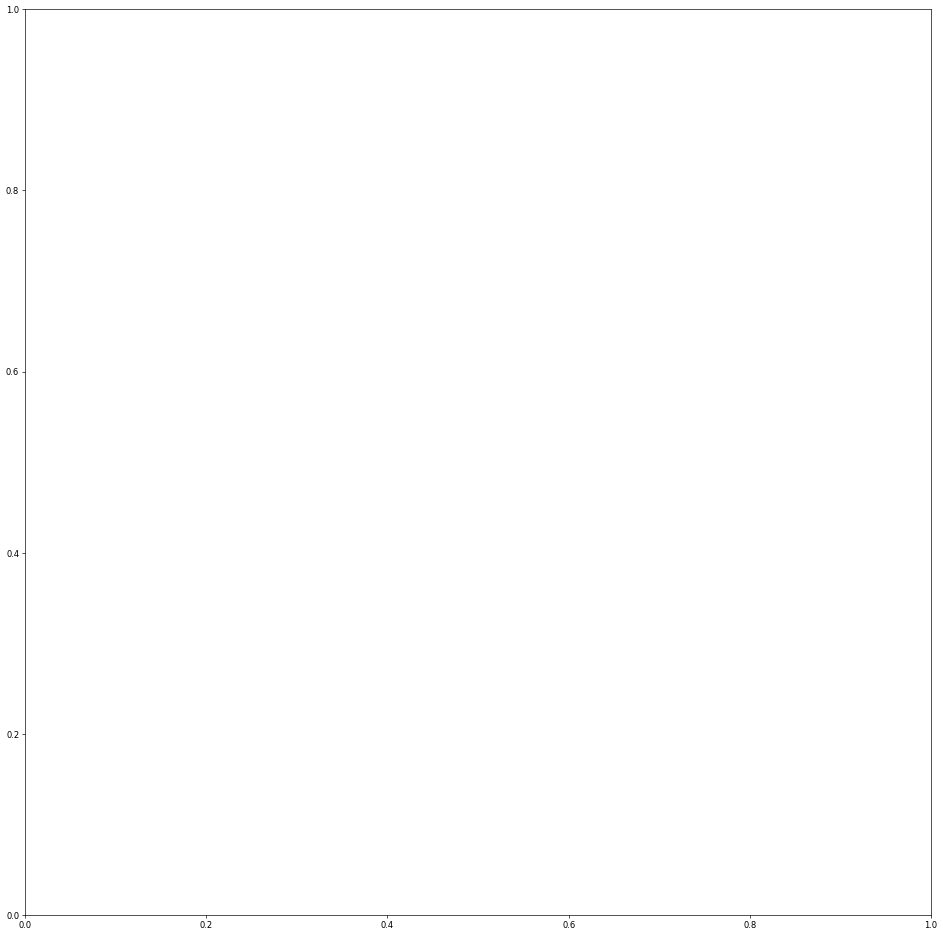

In [20]:
canvas_big = Grid2DCanvas(figsize=(30, 20), dpi=60)

In [21]:
canvas_big.add_supercell(expanded_supercell)

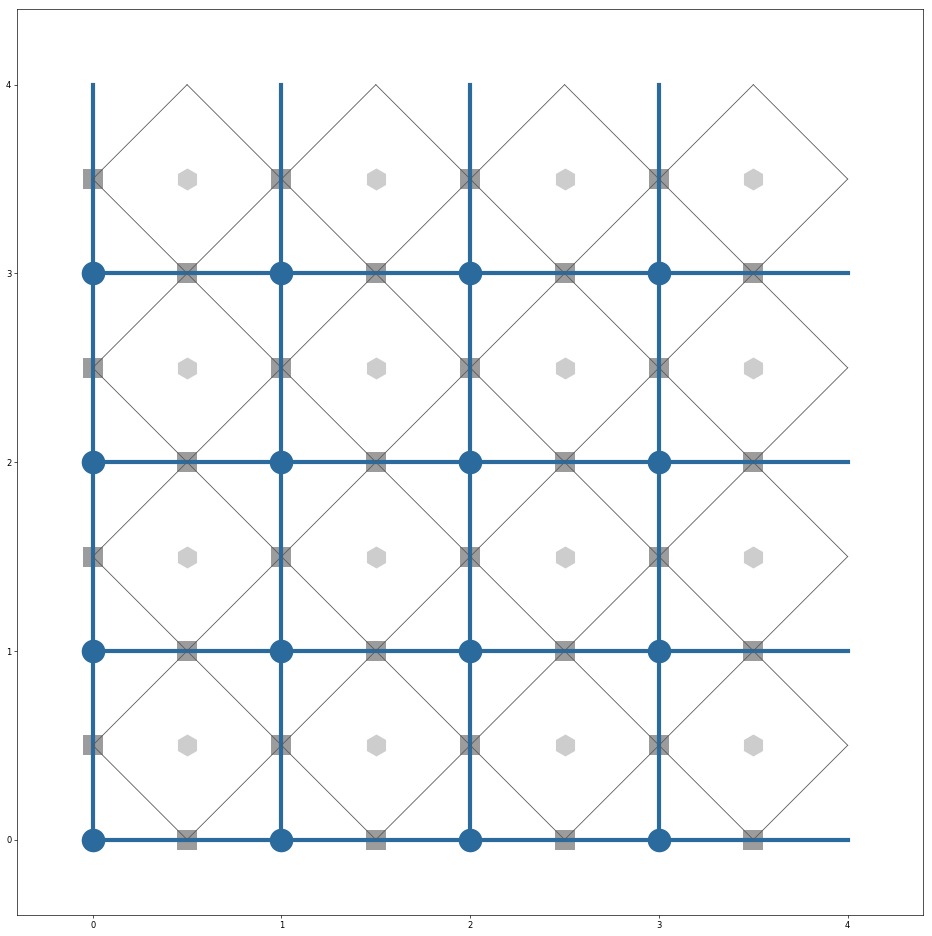

In [22]:
canvas_big.draw()
canvas_big.figure

## 创建空位species node

In [23]:
empty = Node2D([0.0, 0.0], size=3000, 
               color="none", edgecolor="#000000", line_width="2", line_style="dashed", zorder=3, alpha=0.7)

## 创建O2分子

In [24]:
o1 = Node2D([0.0, 0.0], size=3000, color="#B95D60", zorder=4, alpha=0.7)

In [25]:
o2 = o1.clone([1.0, 0.0])

In [26]:
bond = Edge2D(o1, o2, width=15, alpha=0.7)

In [27]:
o2 = SuperCell2D([o1, o2], [bond])

## 创建CO分子

In [28]:
co = Node2D([0.0, 0.0], size=3000, color="#A472C8", zorder=4, alpha=0.7)

## 向画布中添加原子

In [29]:
n0 = empty.clone([1.0, 0.5])
n1 = o1.clone([3.5, 2.0])
n2 = co.clone([1.0, 1.5])
n3 = co.clone([2.0, 2.5])
n4 = co.clone([2.5, 2.0])
n5 = o1.clone([1.5, 2.0])
n6n7 = o2.clone([2.0, 1.0])
n8 = o1.clone([1.0, 2.5])
n9 = empty.clone([2.0, 1.5])
n10 = empty.clone([2.0, 3.5])

In [30]:
canvas_big.add_nodes([n1, n2, n3, n4, n5, n8])
canvas_big.add_supercell(n6n7)

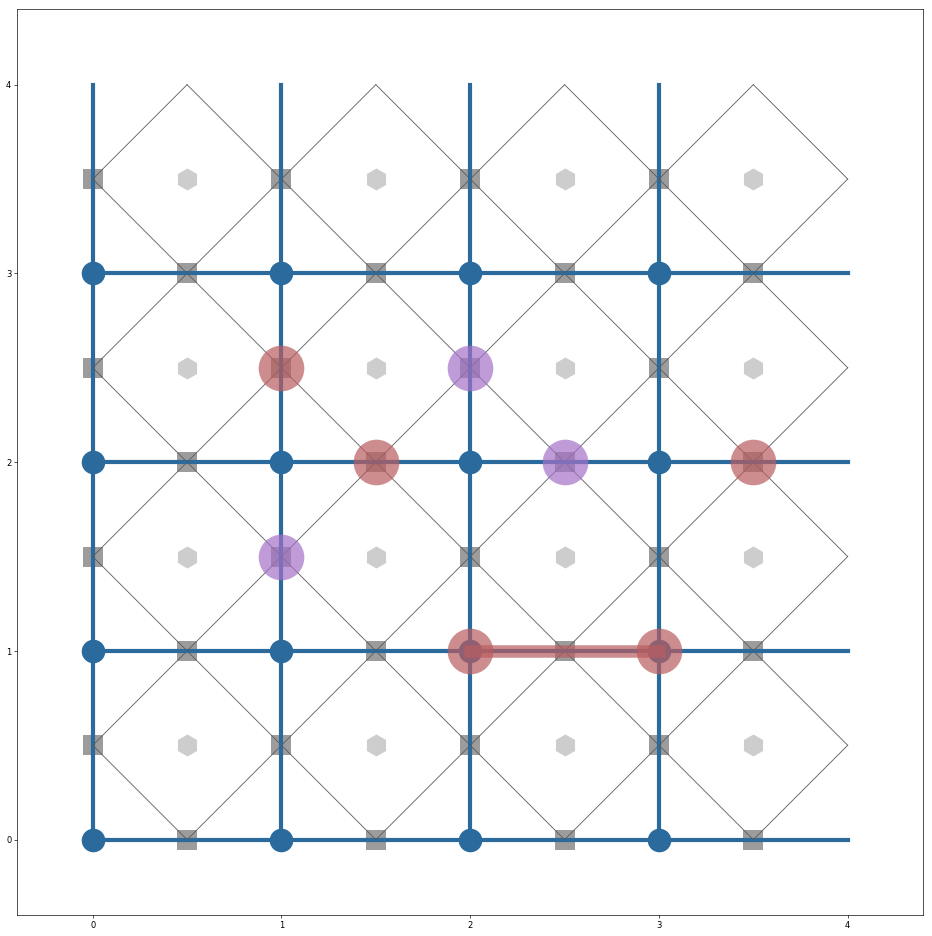

In [31]:
canvas_big.redraw()
canvas_big.figure

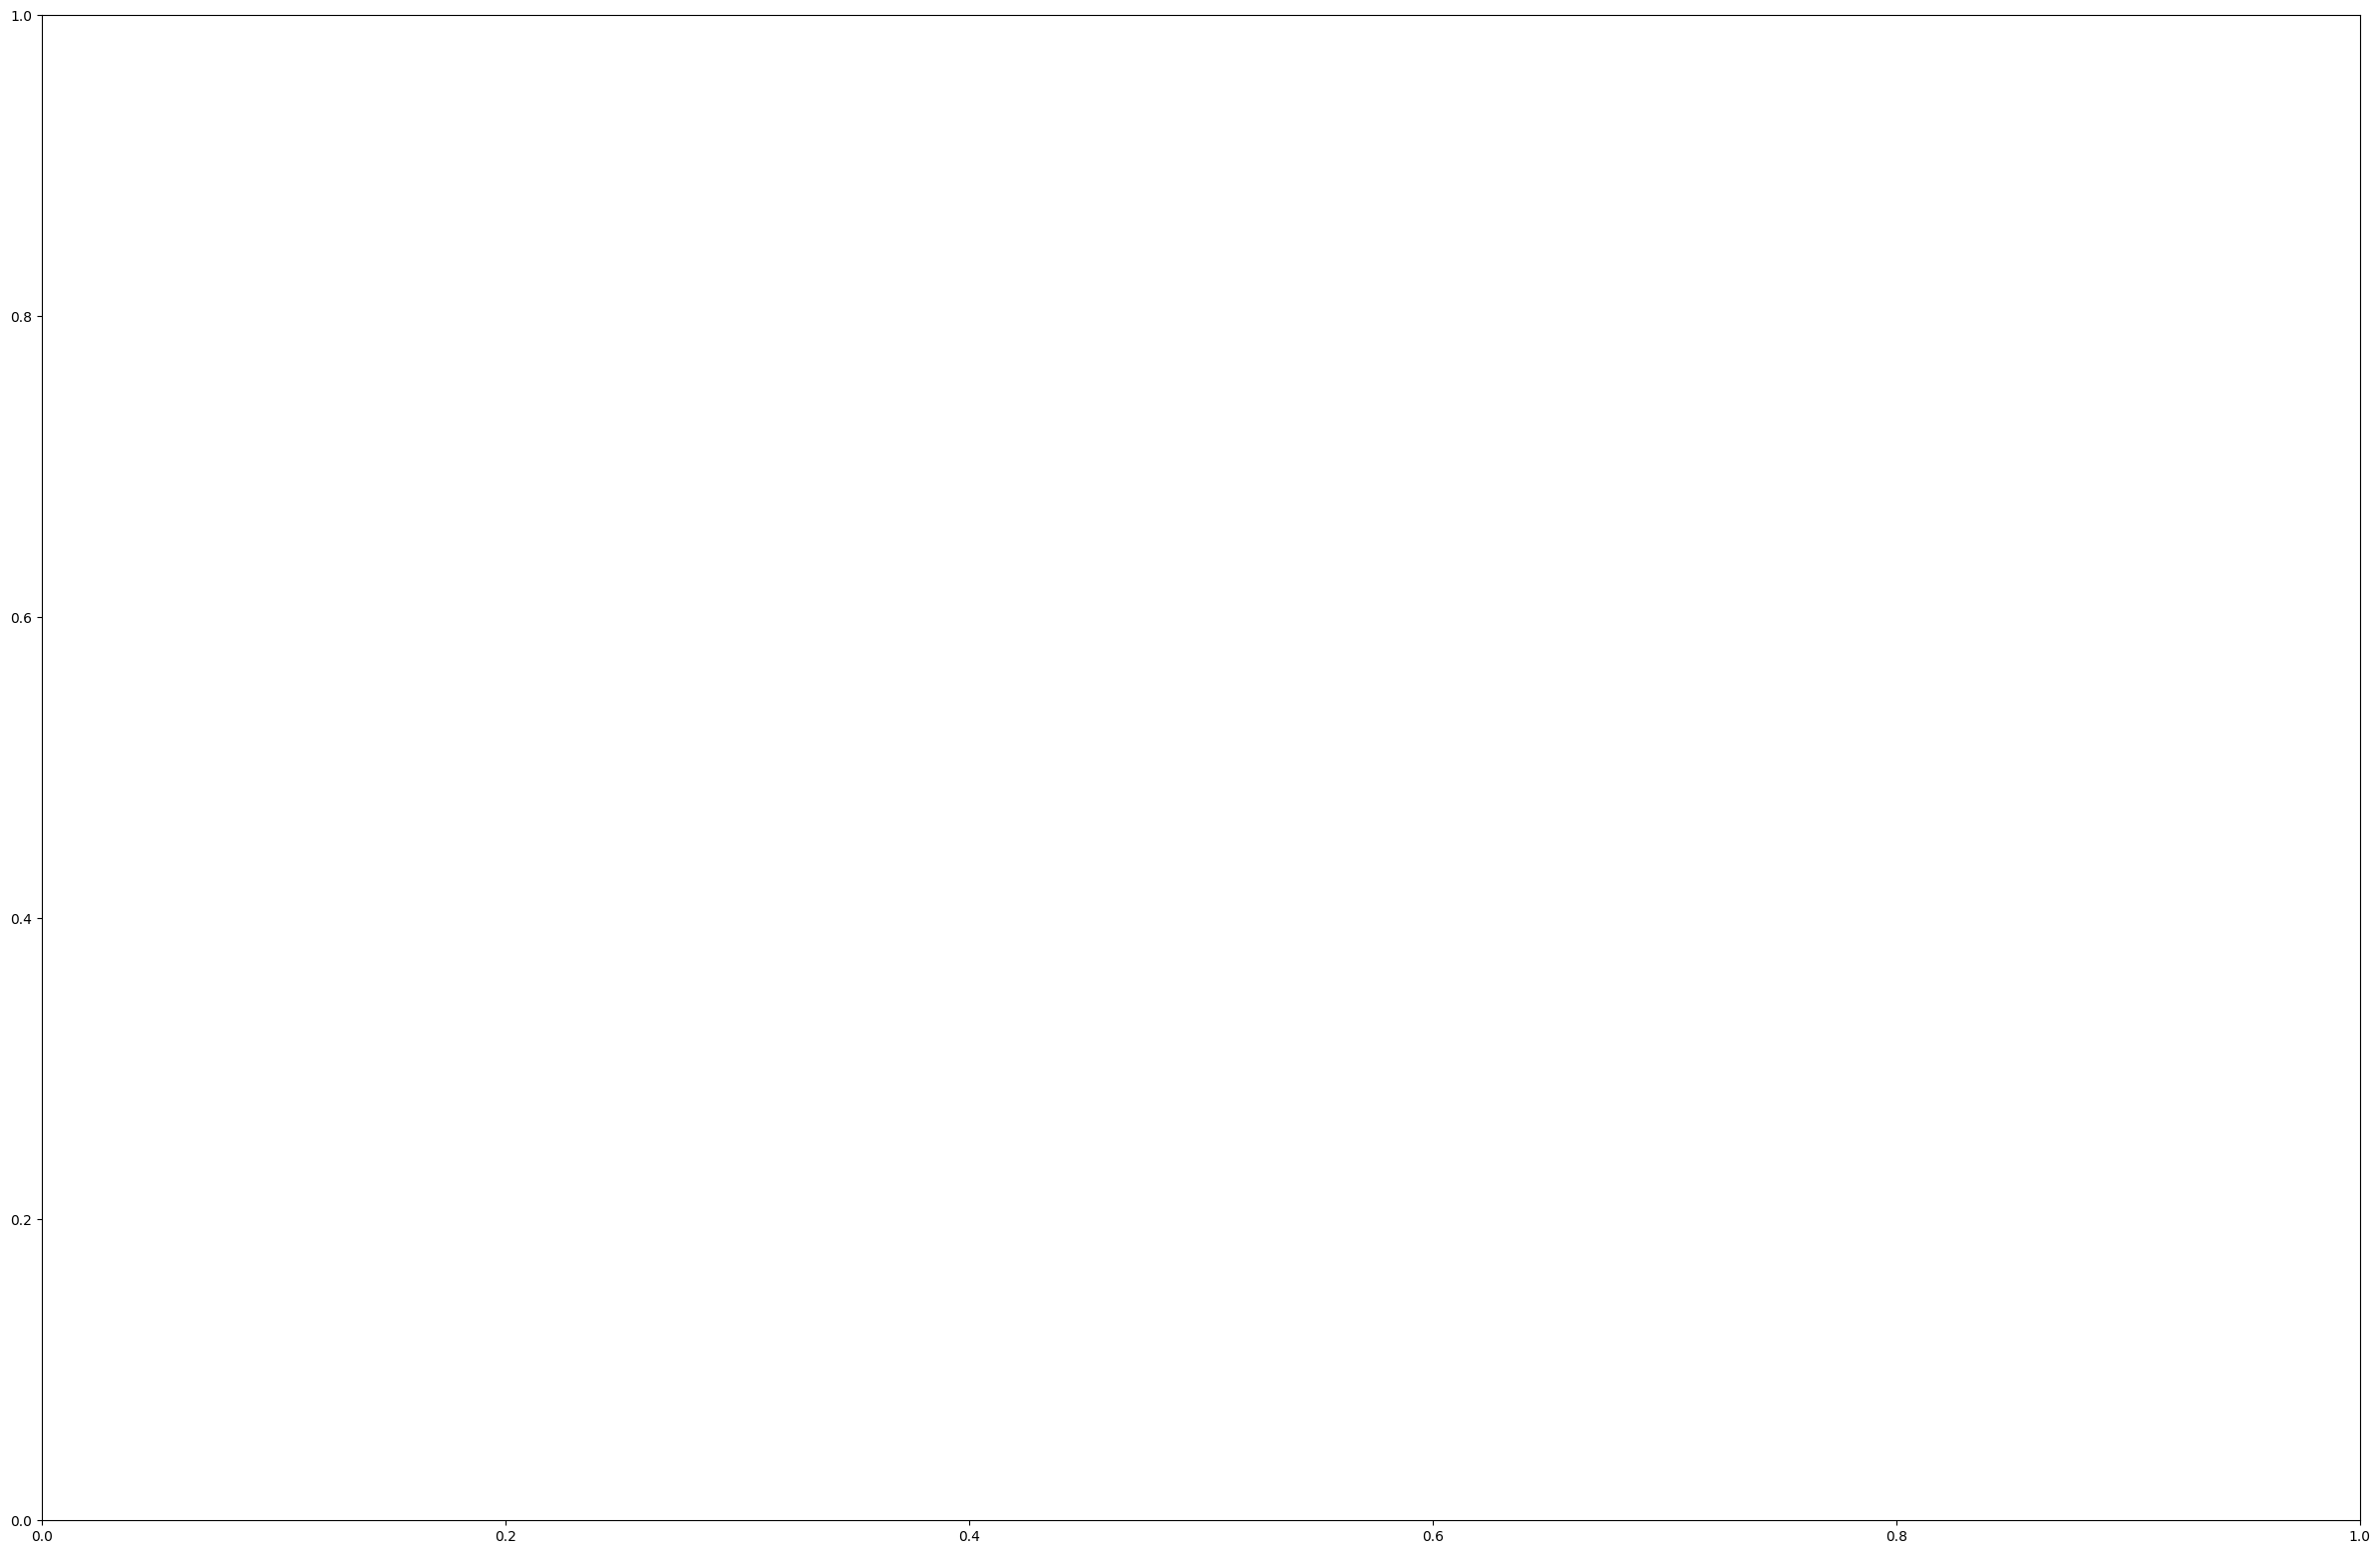

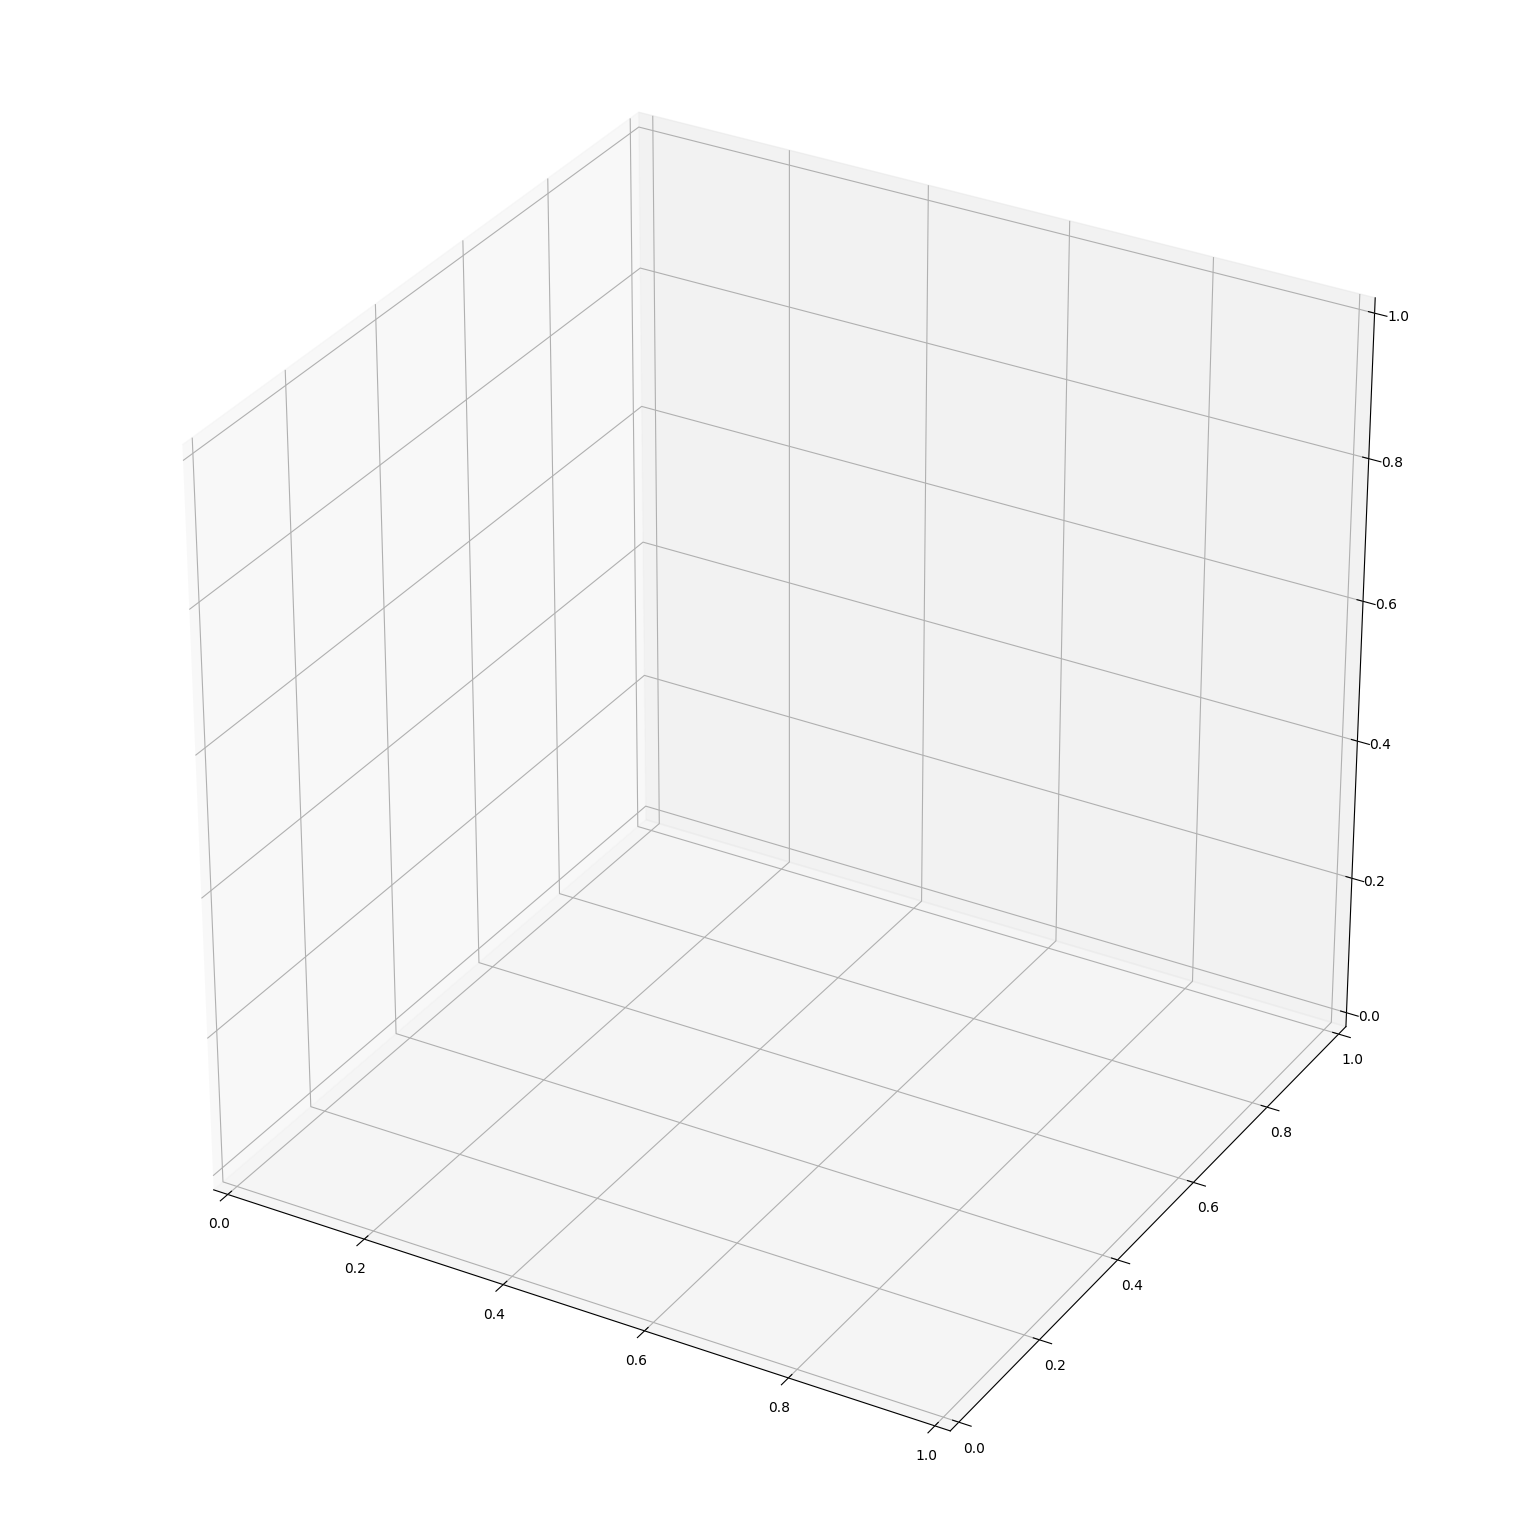

In [32]:
from catplot.grid_components.grid_canvas import Grid3DCanvas
canvas3d = Grid3DCanvas(figsize=(30, 20), dpi=100)

## 将二维网格映射到三维空间中

In [33]:
canvas_big.to3d(canvas3d)

In [34]:
none = Node3D([0.0, 0.0, 1.5], color="", size=0)
canvas3d.add_node(none)

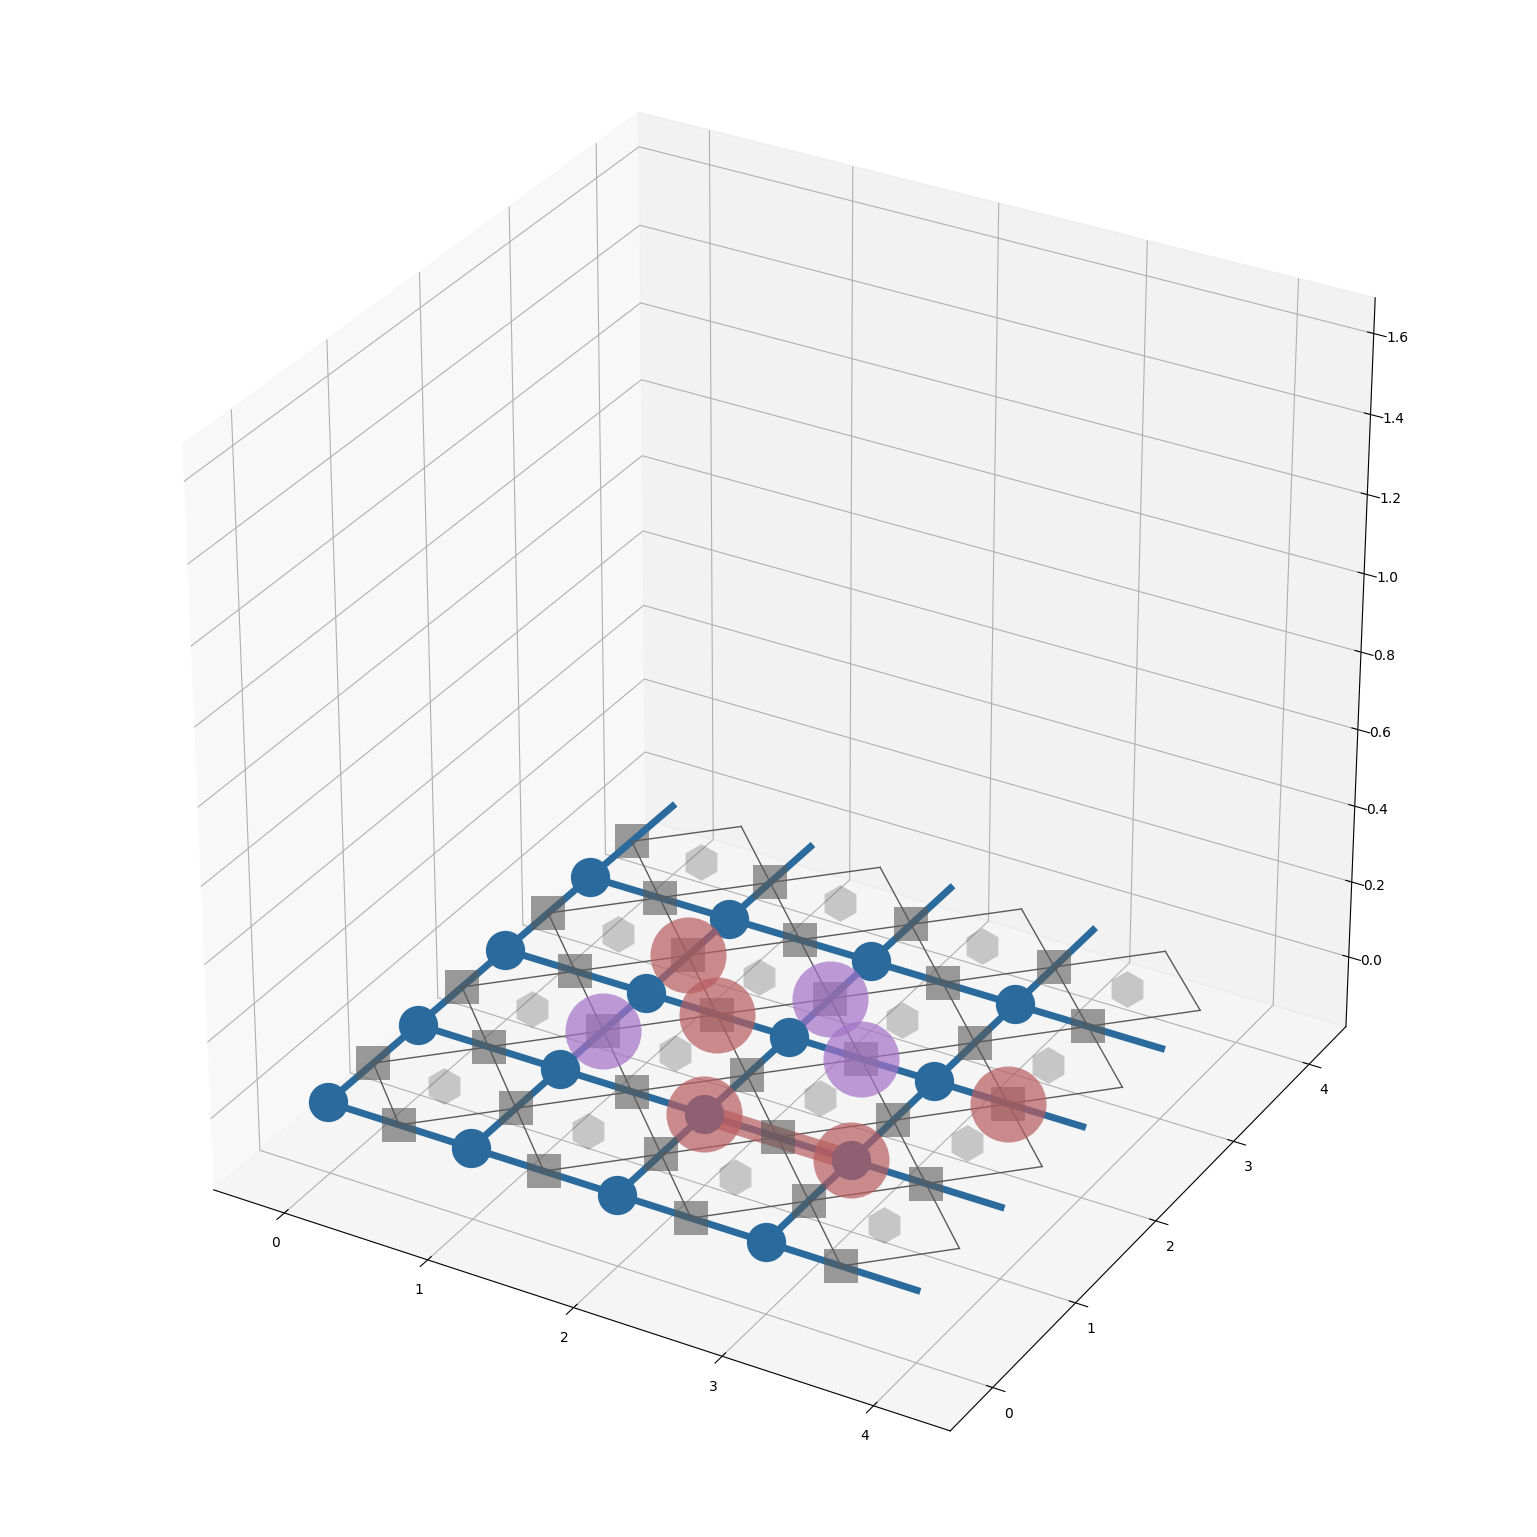

In [35]:
canvas3d.redraw()
canvas3d.figure

## 抽出快物种

In [36]:
f1, = canvas3d.extract_node(n2.label)

In [37]:
f2, = canvas3d.extract_node(n3.label)

In [37]:
f1

In [38]:
f1.move([0.0, 0.0, 1.5])
f2.move([0.0, 0.0, 1.5])

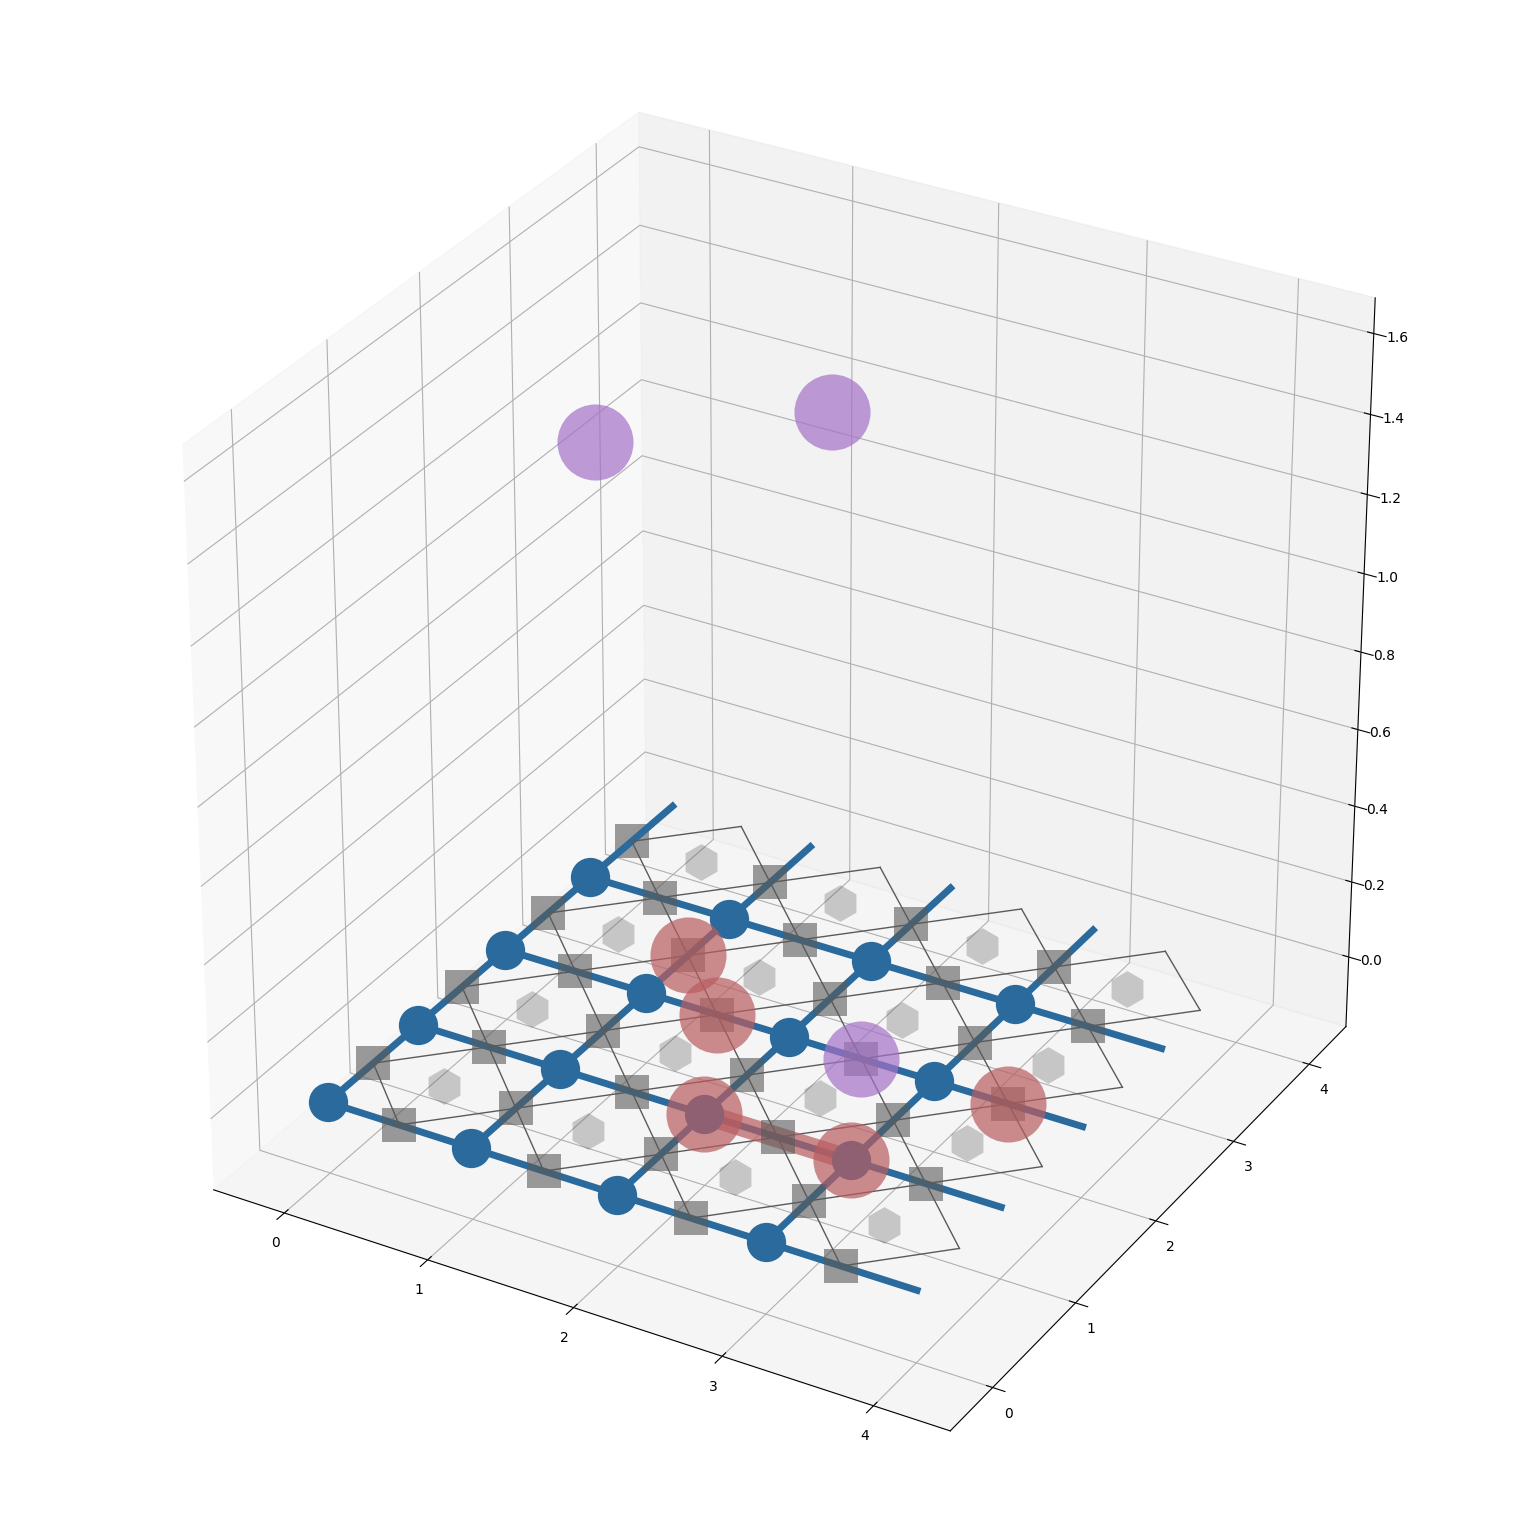

In [39]:
canvas3d.redraw()
canvas3d.figure